<a href="https://colab.research.google.com/github/kodooraKILLER/Chennai-Water-Supply-Manager/blob/master/cwsm_indu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**STEP MINUS 1: PREPARE TRAIN AND TEST CSV DATA**

The data we need is web-mined fro chennai metropolitian water supply website, full credits of data to the government and the municipal water supply board of Chennai. The data is web-mined into 2 sheets: reservoir.xls and reservoir_test.xls and converted to .csv files later on for further usage

**note: this is not applicable for the indu-module**


In [0]:

# Writing to an excel  
# sheet using Python 
import xlwt 
from xlwt import Workbook 
  
# Workbook is created 
wb = Workbook() 
  
# add_sheet is used to create sheet. 
sheet1 = wb.add_sheet('Main_sheet') 
  
sheet1.write(0, 0, 'Date')
sheet1.write(0, 1, 'nth day in year')

sheet1.write(0, 2, 'Storage (mcft)') 
sheet1.write(0, 3, 'Inflow (cusecs)') 
sheet1.write(0, 4, 'Rainfall (mm)') 
sheet1.write(0, 5, 'Outflow (cusecs)')
sheet1.write(0,6, 'Reservoir')

required_td=[14,15,17,16,23,24,26,25,32,33,35,34,50,51,53,52]
content=''
controller=1

import requests
#with open('C:\Users\R. Senthil Kumar\AppData\Local\Programs\Python\Python38-32\content.txt', 'r') as content_file:
  #  content = content_file.read()
from datetime import datetime  
from datetime import timedelta  
def findoccurence(n):
    global content
    position=0
    for i in range(0,n):
        temp=content[content.find('<td ',position):content.find('</td>',position)]
        #print(temp)
        temp=temp[temp.rfind('>',0,temp.find('</font>')-1)+1:temp.find('</font>')]
        #(temp)
        
        position=content.find('</td>',position)+1
    try:
      float(temp)
      return temp
    except:
      return -1


sdate=input('Enter starting date in dd-mm-yyyy format: ')
edate=input('Enter ending date in dd-mm-yyyy format: ')
x=datetime.strptime(sdate,'%d/%m/%Y')
y=datetime.strptime(edate,'%d/%m/%Y')
y+=timedelta(days=1)
edate=y.strftime("%d")+'/'+y.strftime("%m")+'/'+y.strftime("%Y")
stringer=x.strftime("%d")+'/'+x.strftime("%m")+'/'+x.strftime("%Y")
print('Deploying SPYder, please wait...\n(do not disconnect the net-connection or abort the process)\n')
while(stringer!=edate):
    print('current SPYder rezendevous: '+stringer)
    diff=(x-datetime(int(x.strftime("%Y")),1,1)).days
    sheet1.write(controller,0,stringer)
    sheet1.write(controller,1,diff)
    pointer=2
    parameters = {'ldate':stringer}
    r = requests.post('http://123.63.203.150/reserve.asp', data=parameters)
    content=r.text
    origin=1
    for i in required_td:
        #print(controller,pointer,float(findoccurence(i)))
        sheet1.write(controller,pointer,float(findoccurence(i)))
        pointer+=1
        if((pointer-1)%5==0):
            sheet1.write(controller,pointer,origin)
            origin+=1
            if(origin==5):
                break
            else:
                controller+=1
                sheet1.write(controller,0,stringer)
                sheet1.write(controller,1,diff)
                pointer=2
        
    x+=timedelta(days=1)
    stringer=x.strftime("%d")+'/'+x.strftime("%m")+'/'+x.strftime("%Y")
    controller+=1

wb.save('reservoir_test.xls')
print('SPYder deploy success, please open reservoir.xls sheet in your local folder\n')

files.download('reservoir.xls')


KeyboardInterrupt: ignored

In [0]:
from google.colab import files
files.download('reservoir_test.xls')

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://docs.google.com/spreadsheets/d/1cgEFxuW7JlRxAKhlrQ2kMk1F3_qB8LTivBhLlZLR0fY/edit?usp=sharing' # The shareable link


In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('reservoir_test.csv')  
df3 = pd.read_csv('reservoir_test.csv')
# Dataset is now stored in a Pandas Dataframe

sharing


ApiRequestError: ignored

##**STEP 0: IMPORT LIBRARIES**

We need to import keras, tensorflow and seaborn libraries before further processing

1.15.0


In [0]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [0]:

!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 116kB/s 
     |████████████████████████████████| 450kB 58.6MB/s 
     |████████████████████████████████| 3.8MB 43.0MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
!pip install -q seaborn
!pip install -q git+https://github.com/tensorflow/docs

from __future__ import absolute_import,division,print_function,unicode_literals
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

print(tf.__version__)

2.0.0


##**STEP 1: GET THE DATA**

Get data from .csv file named reservoir.csv using pandas for cooking dataset and google io for file upload

In [0]:
from google.colab import files
uploaded = files.upload()


Saving reversoir-Chembarambaakam.csv to reversoir-Chembarambaakam (1).csv


In [0]:
import io
dataset=pd.read_csv(io.BytesIO(uploaded['reversoir-Chembarambaakam.csv']),na_values=-1)#reserve
dataset

,Date,nth day in year,Storage (mcft),Inflow (cusecs),Rainfall (mm),Outflow (cusecs)
0,01/01/2015,0,968.0,0.0,0.0,92.0
1,02/01/2015,1,960.0,0.0,0.0,92.0
2,03/01/2015,2,952.0,0.0,0.0,92.0
3,04/01/2015,3,944.0,0.0,0.0,92.0
4,05/01/2015,4,938.0,0.0,0.0,68.0
...,...,...,...,...,...,...
1822,28/12/2019,361,1718.0,402.0,0.0,67.0
1823,29/12/2019,362,1712.0,0.0,0.0,67.0
1824,30/12/2019,363,1706.0,0.0,0.0,67.0
1825,31/12/2019,364,1700.0,0.0,13.0,67.0


##**STEP 2: CLEAN THE DATA**

Reservoir is not a numeric attribute, it is more of a subjective attribute indicating reservoirs of Chennai. Hence, it is converted to a One-hot datatype.
Also, Check for any NaN values in the dataset and remove them

In [0]:
dataset

,Date,nth day in year,Storage (mcft),Inflow (cusecs),Rainfall (mm),Outflow (cusecs)
0,01/01/2015,0,968.0,0.0,0.0,92.0
1,02/01/2015,1,960.0,0.0,0.0,92.0
2,03/01/2015,2,952.0,0.0,0.0,92.0
3,04/01/2015,3,944.0,0.0,0.0,92.0
4,05/01/2015,4,938.0,0.0,0.0,68.0
...,...,...,...,...,...,...
1822,28/12/2019,361,1718.0,402.0,0.0,67.0
1823,29/12/2019,362,1712.0,0.0,0.0,67.0
1824,30/12/2019,363,1706.0,0.0,0.0,67.0
1825,31/12/2019,364,1700.0,0.0,13.0,67.0


In [0]:
dataset.isna().sum()

Date                 0
nth day in year      0
Storage (mcft)      13
Inflow (cusecs)     13
Rainfall (mm)       13
Outflow (cusecs)    13
dtype: int64

In [0]:
dataset=dataset.dropna()

##**STEP 3: SPLIT THE DATA INTO TRAIN AND TEST**

By default the current dataset is made the training set. Another dataset with newer values is imported as test set (cleaning is necessary).

In [0]:
from google.colab import files
uploaded = files.upload()

Saving reversoir_test-Chembarambaakam.csv to reversoir_test-Chembarambaakam (1).csv


In [0]:
import io
test_dataset=pd.read_csv(io.BytesIO(uploaded['reversoir_test-Chembarambaakam.csv']),na_values=-1)

test_dataset.tail()
test_dataset=test_dataset.drop('Date',1)
dataset=dataset.drop('Date',1)

In [0]:
test_dataset.isna().sum()

nth day in year     0
Storage (mcft)      1
Inflow (cusecs)     1
Rainfall (mm)       1
Outflow (cusecs)    1
dtype: int64

In [0]:
test_dataset=test_dataset.dropna()
test_dataset.tail()

,nth day in year,Storage (mcft),Inflow (cusecs),Rainfall (mm),Outflow (cusecs)
361,361,992.0,0.0,0.0,92.0
362,362,984.0,0.0,10.0,92.0
363,363,984.0,92.0,45.0,92.0
364,364,976.0,0.0,0.0,92.0
365,0,968.0,0.0,0.0,92.0


##**STEP 4: INSPECT THE DATA**

Train dataset data is inspected using sns pair

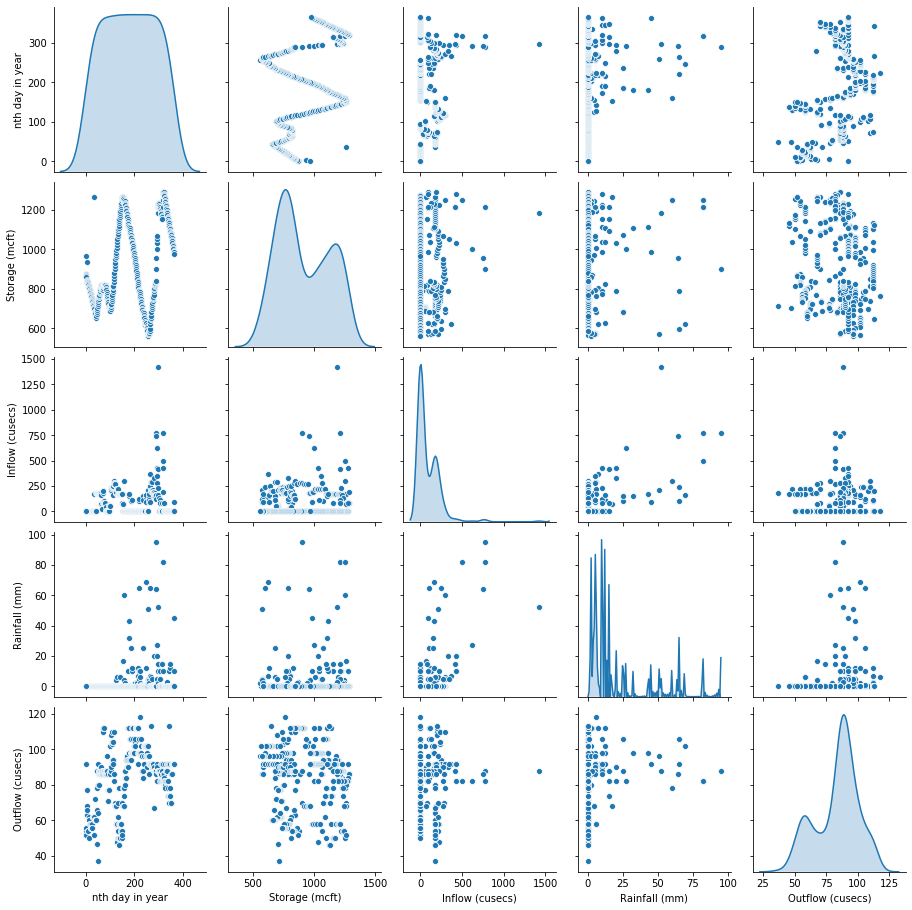

In [0]:
sns.pairplot(test_dataset,diag_kind='kde')

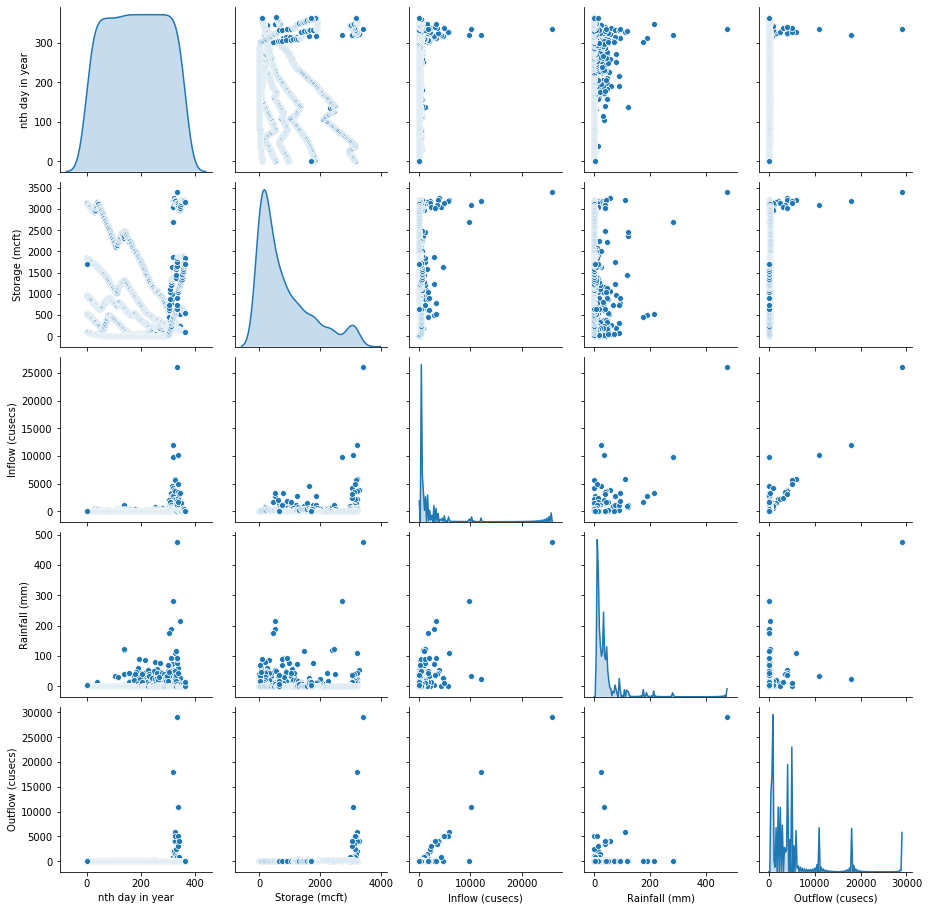

In [0]:
sns.pairplot(dataset,diag_kind='kde')

In [0]:
train_stats=dataset.describe()
train_stats.pop('Outflow (cusecs)')
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
nth day in year,1814.0,182.614664,105.427085,0.0,92.0,183.0,274.00,365.0
Storage (mcft),1814.0,829.266814,877.614158,0.0,166.0,495.5,1268.25,3396.0
Inflow (cusecs),1814.0,129.260750,846.602231,0.0,0.0,0.0,21.00,26000.0
Rainfall (mm),1814.0,4.030981,18.979480,0.0,0.0,0.0,0.00,475.0


##**STEP 5: SPLIT FEATURES**

We need to predict outflow from given data, hence we pop that out from train and test datasets.

In [0]:
train_labels = dataset.pop('Outflow (cusecs)')
test_labels = test_dataset.pop('Outflow (cusecs)')

##**STEP 6: NORMALIZE DATA**

Data needs to be normalized for effective working of neural network system. Z-score method is used here

In [0]:
def norm(x):
  return (x-train_stats['mean'])/(train_stats['std'])
norm_train_data=norm(dataset)
norm_test_data=norm(test_dataset)

      nth day in year  Storage (mcft)  Inflow (cusecs)  Rainfall (mm)
0                   0           968.0              0.0            0.0
1                   1           960.0              0.0            0.0
2                   2           952.0              0.0            0.0
3                   3           944.0              0.0            0.0
4                   4           938.0              0.0            0.0
...               ...             ...              ...            ...
1822              361          1718.0            402.0            0.0
1823              362          1712.0              0.0            0.0
1824              363          1706.0              0.0            0.0
1825              364          1700.0              0.0           13.0
1826                0          1694.0              0.0            3.0

[1814 rows x 4 columns]


##**STEP 7: BUILD THE MODEL**

Use keras API to build the 3 layer neural netork model.

In [0]:
def build_model():
  model=keras.Sequential([   
    layers.Dense(64, activation='relu', input_shape=[len(dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])
  optimizer=tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae','mse'])
  return model
  

In [0]:
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [0]:
example_batch = norm_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.01507638],
       [ 0.03984231],
       [-0.25511283],
       [ 0.4486625 ],
       [ 0.02832519],
       [ 0.0397658 ],
       [-0.25382492],
       [ 0.4470434 ],
       [ 0.02450636],
       [ 0.03979147]], dtype=float32)

##**STEP 8: TRAIN THE MODEL**

Use the ANN to train with given dataset

In [0]:
EPOCHS=2000
history=model.fit(
    norm_train_data,train_labels,
    epochs=EPOCHS,validation_split=0.2,verbose=0,
    callbacks=[tfdocs.modeling.EpochDots()]
)


Epoch: 0, loss:1012910.6047,  mae:159.0548,  mse:1012910.6875,  val_loss:218.9740,  val_mae:9.2560,  val_mse:218.9740,  
....................................................................................................
Epoch: 100, loss:205497.1055,  mae:80.3718,  mse:205497.1250,  val_loss:25921.1256,  val_mae:128.2859,  val_mse:25921.1270,  
....................................................................................................
Epoch: 200, loss:103406.5765,  mae:53.3588,  mse:103406.5547,  val_loss:8068.5325,  val_mae:78.0909,  val_mse:8068.5322,  
....................................................................................................
Epoch: 300, loss:83051.1554,  mae:48.0297,  mse:83051.1562,  val_loss:6256.5344,  val_mae:69.6499,  val_mse:6256.5347,  
....................................................................................................
Epoch: 400, loss:66772.4023,  mae:41.1089,  mse:66772.3906,  val_loss:3951.9664,  val_mae:54.2366,  val_

In [0]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist
min(hist['mae'])

21.28957748413086

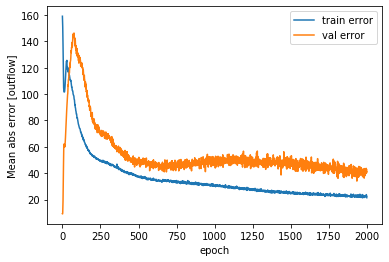

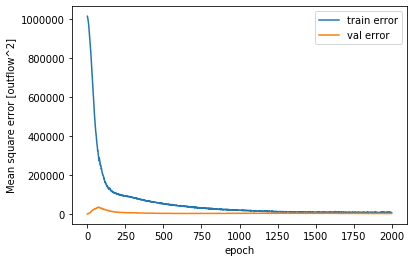

In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure()
  plt.xlabel('epoch')
  plt.ylabel('Mean abs error [outflow]')
  plt.plot(hist['epoch'],hist['mae'],
          label='train error')
  plt.plot(hist['epoch'],hist['val_mae'],
          label='val error')
  plt.legend()

  
  plt.figure()
  plt.xlabel('epoch')
  plt.ylabel('Mean square error [outflow^2]')
  plt.plot(hist['epoch'],hist['mse'],
          label='train error')
  plt.plot(hist['epoch'],hist['val_mse'],
          label='val error')
  plt.legend()
plot_history(history)
    

In [0]:
model=build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1000)
history=model.fit(norm_train_data,train_labels,epochs=EPOCHS,
                  validation_split=0.2,verbose=0,callbacks=[#early_stop,
                                                            tfdocs.modeling.EpochDots()])


Epoch: 0, loss:1012845.9462,  mae:159.1890,  mse:1012845.7500,  val_loss:228.2872,  val_mae:9.3052,  val_mse:228.2872,  
....................................................................................................
Epoch: 100, loss:174663.6291,  mae:73.7349,  mse:174663.6250,  val_loss:25068.7814,  val_mae:124.4190,  val_mse:25068.7832,  
....................................................................................................
Epoch: 200, loss:103313.9597,  mae:52.1150,  mse:103313.9766,  val_loss:7382.9064,  val_mae:76.5404,  val_mse:7382.9062,  
....................................................................................................
Epoch: 300, loss:85838.2134,  mae:45.6573,  mse:85838.2109,  val_loss:4363.6260,  val_mae:59.3299,  val_mse:4363.6265,  
....................................................................................................
Epoch: 400, loss:68776.9067,  mae:41.1122,  mse:68776.9141,  val_loss:3147.4071,  val_mae:50.2998,  val_

In [0]:
loss, mae, mse = model.evaluate(norm_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} cusecs".format(mae))

365/365 - 0s - loss: 1127.1046 - mae: 28.4006 - mse: 1127.1045
Testing set Mean Abs Error: 28.40 cusecs


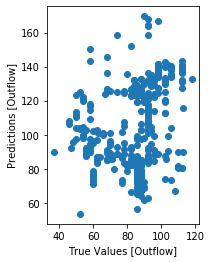

In [0]:
test_predictions = model.predict(norm_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Outflow]')
plt.ylabel('Predictions [Outflow]')

_ = plt.plot()

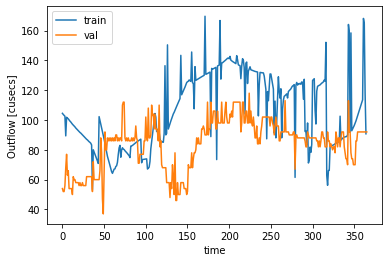

In [0]:
plt.figure()
plt.xlabel('time')
plt.ylabel('Outflow [cusecs]')
  
plt.plot(test_predictions,
          label='train')
plt.plot(test_labels,
          label='val')
plt.legend()


In [0]:
test_labels

0      54.0
1      52.0
2      52.0
3      56.0
4      68.0
       ... 
361    92.0
362    92.0
363    92.0
364    92.0
365    92.0
Name: Outflow (cusecs), Length: 365, dtype: float64